# QCTO - Workplace Module

## Mastering Avocado Pricing: A Strategic Approach to Regional, Seasonal, and Predictive Insights
#### Done By: Keneilwe Rangwaga
#### Deliverables
* [Github](https://github.com/keneilweRangw/my_project)
* [Trello](https://trello.com/invite/b/66c4d820321f790837357797/ATTI12e5e3913d28c20a257a01f8225ac0c5B364206D/capstoneprojectkrangwaga)

© ExploreAI 2024
<p align="center">
  <img src="https://plantsvibe.com/wp-content/uploads/2024/05/avocado-tree-growth-phases.jpg" alt="Navigating Avocado Pricing" width="600">
</p>

---

<a id="toc"></a>
## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>


---
<a id="BC"></a>
## **Background Context**
<a href=#toc>Back to Table of Contents</a>

**Introduction:**

Avocados have become more than just a trendy fruit; they represent a dynamic and rapidly evolving market within the global produce industry. From guacamole at the dinner table to avocado toast on breakfast menus worldwide, the demand for avocados has surged over the past decade. However, this popularity has introduced complexities in the avocado market, particularly concerning pricing and sales volume. Various factors, including regional demand, seasonality, and market dynamics, have significantly impacted how avocados are priced and sold across different regions and times of the year.

To better understand these complexities, this project aims to dissect the intricate patterns of avocado pricing and sales from 2015 to 2023, provided by the Hass Avocado Board. By exploring the interplay between geography, seasonality, and economic factors, the project aims to reveal the underlying trends and patterns that influence avocado pricing and sales. The insights gained will be crucial for stakeholders in the avocado industry to optimize their pricing strategies, forecast market trends, and enhance the overall efficiency of the supply chain.

Problem Statement:

Avocado pricing and sales are influenced by a complex interplay of regional differences, seasonal trends, and market dynamics. For stakeholders in the avocado industry, understanding these factors is critical to optimizing pricing strategies, forecasting future trends, and enhancing supply chain efficiency. This project seeks to address the challenge of accurately analyzing how geography, seasonality, and economic events have impacted avocado prices and sales volumes from 2015 to 2023.By developing predictive models and integrating these insights, this project aims to provide actionable recommendations that will enable better decision-making and strategic planning in the avocado market

---
<a id="one"></a>
## **Importing Package**
<a href=#toc>Back to Table of Contents</a>


* In this section we're going to List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
import warnings
warnings.filterwarnings('ignore')# Ignore all warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

---
<a id="two"></a>
## **Data Collection and Description**
<a href=#toc>Back to Table of Contents</a>

This data was initially downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The dataset tracks the sales of avocados across different regions, product types (conventional vs. organic), and over time. Here's how the Hass Avocado Board describes the data on their website:


The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
You can access the data [here](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data) through kaggle.

The dataset contains 53,415 entries and 12 columns, with information on avocado prices, volumes, and regions from 2015 to 2023. Here’s a summary of the key details:
* Categorical
* Total Rows: 53,415
* Total Columns: 12

Columns Information:

1.	Date: The date of the observation (466 unique dates).
2.	AveragePrice: The average price of avocados.
3.	TotalVolume: The total volume of avocados sold.
4.	plu4046, plu4225, plu4770: Specific product look-up codes (PLU) representing different avocado products.

    4046 - small/medium Hass Avocados (~3-5 oz)

    4225 - large Hass Avocados (~8-10 oz)

    4770 - extra large Hass Avocados (~10-15 oz)
5.	TotalBags, SmallBags, LargeBags, XLargeBags: Number of avocados sold in different packaging types.

6.	Type: Indicates whether the avocado is “conventional” or “organic”.
7.	Region: Region of the sale (60 unique regions).


---
<a id="three"></a>
## **Loading Data**
<a href=#toc>Back to Table of Contents</a>

In this section we're going to load the data into the notebook for manipulation and analysis.
- The code in the cell below is used to load the data/csv file and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
# Load the dataset
df = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

# Check the first few rows to understand the data
print(df.head())

         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  


---
<a id="four"></a>
## **Data Cleaning and Filtering**
<a href=#toc>Back to Table of Contents</a>


Data cleaning is the essential first step in any analysis, much like laying down a strong foundation before building a house. It’s about carefully going through your dataset to spot and fix any errors, inconsistencies, or gaps, making sure everything is accurate and relevant.
During this process, I focus on tasks like removing duplicates, correcting mistakes, and handling missing values. It’s about organizing and refining the data so that when it comes time to analyze, the results are trustworthy and precise.

In short, data cleaning is crucial because it directly influences the quality of your analysis, ensuring that the insights you gain are reliable and actionable.

**Below are the steps we will explore to clean the dataset**
1. Understanding the Data
2. Handling Missing Values
3. Date Column Formatting
4. Handling Inconsistent Data
5. Feature Engineering
6. Data Validation
7. Final Cleaned Dataset
---



#### 1. Understanding the Data

* Check for Missing Values: Identify columns with missing values and determine the extent of missing data.
* Check for Duplicates: Identify and remove any duplicate rows in the dataset.
* Check Data Types: Ensure that each column has the correct data type.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check data types
print("Data Types:\n", df.dtypes)

Missing Values:
 Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64
Number of duplicate rows: 0
Data Types:
 Date             object
AveragePrice    float64
TotalVolume     float64
plu4046         float64
plu4225         float64
plu4770         float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
region           object
dtype: object


The analysis reveals a key challenge in the dataset: 12,390 missing values lurking in the `SmallBags`, `LargeBags`, and `XLargeBags` columns. The good news? All other columns, like `Date`, `AveragePrice`, and `TotalVolume`, are intact and ready to go. But now comes the important question: How do we tackle these missing values to ensure the dataset stays robust for further analysis? Let's dive into the next step and find the best solution!

#### 2. Handling Missing Values
Well in this step we're gonna deal with that complicated data by:
* Analyze Missing Data: Determine which columns have missing data and consider the best approach (e.g., imputation, deletion).  
* Impute Missing Values: If the missing data is minimal, consider imputing it with the mean, median, or mode as appropriate. I demonstrated how to handle missing values


In [ ]:
# Impute missing values with the mean
df['SmallBags'].fillna(df['SmallBags'].mean(), inplace=True)
df['LargeBags'].fillna(df['LargeBags'].mean(), inplace=True)
df['XLargeBags'].fillna(df['XLargeBags'].mean(), inplace=True)

# Format the values to 2 decimal places
df = df.round(2)
print(df)

             Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0      2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1      2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2      2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3      2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4      2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...           ...           ...          ...        ...        ...       ...   
53410  2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411  2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412  2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413  2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414  2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags

Reason behind this step: Missing data can skew analysis or produce inaccurate predictions.
- Therefor, I used mean imputation to fill in missing values in numeric columns, ensuring that the integrity of the dataset was maintained without distorting trends.

Fun Fact:

*Imputation allows the dataset to remain complete for future predictive modeling, without introducing biases through arbitrary values.*

Lastly,
the code rounds all numeric values in the DataFrame df to two decimal places using df.round(2) and then prints the updated DataFrame. This makes the data more readable and consistent by ensuring all numbers are uniformly formatted.

#### 3. Date Column Formatting
* Convert Date Column: Ensure the Date column is in datetime format to allow for easier manipulation and analysis.


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df)

            Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0     2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1     2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2     2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3     2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4     2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...          ...           ...          ...        ...        ...       ...   
53410 2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411 2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412 2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413 2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414 2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags

Next up! is the consistancy check

#### 4. Handling Inconsistent Data
* Standardize Text Data: Ensure consistency in text-based columns, make sure there is no inconsistent capitalization or spelling.
* Correct Outliers: Identify any outliers that may affect the analysis, especially in price or volume-related columns. Outliers should be analyzed to decide if they should be removed or retained.

In [ ]:
# Standardize text data
df['region'] = df['region'].str.lower().str.strip()# Convert to lowercase and strip leading/trailing spaces
df['type'] = df['type'].str.lower().str.strip()  # Convert to lowercase and strip leading/trailing spaces
df['region'] = df['region'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
df['type'] = df['type'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space

# Detect outliers using Z-score
# Calculate Z-scores for the 'AveragePrice' column
df['z_score'] = np.abs(stats.zscore(df['AveragePrice']))

# Filter out outliers (Z-score > 3 is often considered an outlier)
df_clean = df[df['z_score'] < 3]
df_clean.drop(columns=['z_score'], inplace=True)

Inconsistencies in text-based data were addressed by standardizing text values. For example, "region" and "type" names were converted to lowercase and any leading or trailing spaces were removed to ensure uniformity.

Additionally to identify and remove potential outliers, I calculated the Z-scores for the 'AveragePrice' feature. Z-scores greater than 3 were considered outliers and removed to prevent skewing the analysis.


#### 5. Feature Engineering


*	Aggregate Data: Depending on the analysis goals, consider aggregating data by region, year, or quarter.
*   Create New Features: Based on existing columns, create new features that may be useful for analysis





In [ ]:
# Extract year, month, and day features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Create a new feature 'PricePerUnitVolume'
# Calculate the price per unit volume (AveragePrice / TotalVolume)
df_clean['PricePerUnitVolume'] = df_clean['AveragePrice'] / df_clean['TotalVolume']

# Aggregate data by region and year
agg_data = df_clean.groupby(['region', 'Year']).agg({
    'AveragePrice': 'mean',
    'TotalVolume': 'sum'
}).reset_index()
print(df_clean)

            Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0     2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1     2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2     2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3     2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4     2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   
...          ...           ...          ...        ...        ...       ...   
53410 2023-12-03          1.55      5693.91     204.64    1211.25      0.00   
53411 2023-12-03          1.70    343326.10   66808.44  132075.11     58.65   
53412 2023-12-03          1.62     34834.86   15182.42    1211.38      0.00   
53413 2023-12-03          1.25      2942.83    1058.54       7.46      0.00   
53414 2023-12-03          1.48   2010020.72  271808.32  274480.64     63.43   

        TotalBags  SmallBags  LargeBags  XLargeBags

The cell performed several operations to enhance the dataset. It extracted the `Year` and `Month` from the `Date` column, which facilitated time-based analysis. It then calculated the `PricePerUnitVolume` by dividing the `AveragePrice` by the `TotalVolume`, showing how much each unit of volume cost. The cell grouped the data by `region` and `Year`, summarizing the average price and total sales volume for each region and year. Finally, it printed the updated DataFrame to allow for verification and review, now leaving us with 15 columns instead of 12. These steps collectively made the dataset more suitable for analyzing trends over time and across regions, and provided clearer insights into pricing and sales volume.

#### 6. Data Validation
Finally, I performed validation checks on the cleaned dataset to ensure consistency, with no missing values or duplicates, and verified that the dataset was ready for analysis.

Steps:
* Verify Data Consistency: Check for any inconsistencies or anomalies across the dataset after cleaning.
* Cross-Validation: Validate the cleaned data by cross-checking with any available external sources or by ensuring logical consistency across different columns.



In [ ]:
# Check for consistency in the cleaned data
print(df_clean.describe())

# Verify that there are no missing values
print("Missing Values After Cleaning:\n", df_clean.isnull().sum())

# Check for duplicates again after cleaning
print(f"Number of duplicate rows after cleaning: {df_clean.duplicated().sum()}")

                                Date  AveragePrice   TotalVolume  \
count                          53162  53162.000000  5.316200e+04   
mean   2019-07-21 23:22:22.567999744      1.422541  8.735184e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2017-05-14 00:00:00      1.120000  1.647635e+04   
50%              2019-08-11 00:00:00      1.400000  1.217986e+05   
75%              2021-10-03 00:00:00      1.690000  4.571965e+05   
max              2023-12-03 00:00:00      2.600000  6.103446e+07   
std                              NaN      0.382925  3.553208e+06   

            plu4046       plu4225       plu4770     TotalBags     SmallBags  \
count  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04   
mean   2.996787e+05  2.232417e+05  2.062959e+04  2.185275e+05  1.042667e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    7.079475e+02  2.118660e+03  0.000000e+00  8.010360e+03  0.000000

The code in the cell above gives a clear message that our cleaning techniques worked and the dataset is now clean as you can see there are no missing values, or duplicates present

#### 7. Final Cleaned Dataset
* Create a Final Cleaned Dataset: After performing all necessary steps, create a final cleaned version of the dataset that is ready for exploratory data analysis (EDA) and modeling.


In [ ]:
# Save the cleaned dataset
df_clean.to_csv('cleaned_avocado_data.csv', index=False)

The code in the cell above creates and saves the dataset that was cleaned as a csv file named `cleaned_avocado_data`

---

In this phase, I thoroughly cleaned and prepared the avocado dataset by handling missing values, standardizing text data, detecting outliers, and engineering new features. This sets the stage for the next phase of analysis, where I will explore price trends, perform predictive modeling, and offer strategic recommendations based on the insights gained.

This data preparation process ensures that the dataset is well-structured, consistent, and ready for advanced analysis, which is crucial for understanding regional and seasonal avocado price trends from 2015 to 2023.

---

<a id="five"></a>
## **Exploratory Data Analysis (EDA)**
<a href=#toc>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) is a critical process in data analysis where we summarize and visualize data to gain insights and understand underlying patterns. It helps identify trends, outliers, and relationships within the dataset. Through graphical representations, such as histograms, scatter plots, and box plots, along with summary statistics like mean, median, and variance, EDA allows researchers to explore relationships between variables and assess the overall distribution of the data. This preliminary analysis is essential for forming hypotheses and making informed decisions before applying more formal statistical methods.

I will begin by performing summary statistics for the numeric columns, then move on to regional analysis and seasonal analysis. Following these, I will conduct additional analyses to further explore the dataset.

### 1. Summary Statistics

In this section, I will calculate summary statistics for the numeric columns in the avocado sales dataset. Summary statistics provide a quick overview of the data's central tendency, dispersion, and overall distribution. Key metrics to be included are:

- **Count:** The number of observations in each numeric column.
- **Mean:** The average value, offering insight into the central tendency.
- **Standard Deviation:** This measures the amount of variation or dispersion in the data.
- **Minimum and Maximum:** These values indicate the range of the data, highlighting the smallest and largest observations.
- **25th, 50th (median), and 75th Percentiles:** These percentiles help understand the distribution of the data, showing where the bulk of the data points lie.

By analyzing these summary statistics, I will gain a better understanding of the overall characteristics of the dataset, which will inform subsequent analyses.







In [ ]:
descriptions = df_clean.describe()
print(descriptions)

                                Date  AveragePrice   TotalVolume  \
count                          53162  53162.000000  5.316200e+04   
mean   2019-07-21 23:22:22.567999744      1.422541  8.735184e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2017-05-14 00:00:00      1.120000  1.647635e+04   
50%              2019-08-11 00:00:00      1.400000  1.217986e+05   
75%              2021-10-03 00:00:00      1.690000  4.571965e+05   
max              2023-12-03 00:00:00      2.600000  6.103446e+07   
std                              NaN      0.382925  3.553208e+06   

            plu4046       plu4225       plu4770     TotalBags     SmallBags  \
count  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04  5.316200e+04   
mean   2.996787e+05  2.232417e+05  2.062959e+04  2.185275e+05  1.042667e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    7.079475e+02  2.118660e+03  0.000000e+00  8.010360e+03  0.000000

This summary presents key statistics from a dataset on avocado sales, covering 53,162 records from January 4, 2015, to December 3, 2023. The average price of avocados is approximately 1.42 dollars, with prices ranging from 0.44 to 2.60 dollars, while the average total volume sold is around 873,518 units, varying from a minimum of 84 units to a maximum exceeding 61 million. Sales data for different types of avocados, identified by PLU codes, shows that small/medium Hass avocados (PLU 4046) have an average sales volume of 299,678 units, large Hass avocados (PLU 4225) average 223,242 units, and extra-large Hass avocados (PLU 4770) average 20,630 units. Additionally, the average total number of bags sold is 218,527, with 104,267 small bags sold on average, indicating a significant variation in sales volume across bag sizes. The dataset spans various months and years, with the average year being 2019 and the average month recorded as June. The price per unit volume averages around 0.00010177 dollars, with wide variability, suggesting different pricing strategies or market conditions. Rolling averages indicate an average volume of 873,639 units and a rolling average price of about 1.42 dollars, providing insights into trends in avocado sales and pricing over time. Overall, this statistical overview highlights important insights into consumer purchasing patterns, pricing trends, and sales performance in the avocado market.

### 2.Regional Sales Analysis
This section will focus on how avocado prices and sales volumes differ by region. The goal is to compare how regions are doing in terms of both pricing and the total volume of sales.

2.1.Total Sales Volume by Region

2.2. Average Price Comparison by Region

2.3. Price Per Unit Volume Comparison by Region

2.4. Sales of Specific Avocado Hass sizes by Region (PLU 4046, 4225, 4770)

2.5. Sales of Avocados in Different Bag Types by Region

#### 2.1. Total Sales Volume by Region

I'm going to start by analyzing the **Total Sales Volume by Region**. By aggregating sales volumes across all regions, I'll create a visual representation that highlights the areas with the highest demand for avocados. This analysis will reveal which regions are driving the most sales, helping us understand regional consumption patterns and preferences.


In [ ]:
# Create a new DataFrame for the treemap
treemap_data = df.groupby(['region'])['TotalVolume',].sum().reset_index()

# Create the interactive treemap
fig = px.treemap(
    treemap_data,
    path=['region'],  # Define the hierarchy
    values='TotalVolume',  # The value to size the rectangles
    title='Avocado Sales Treemap by Region',
    color='TotalVolume',  # Color by sales volume
    color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
    hover_data={'TotalVolume': True},  # Show total volume on hover
)

# Update layout for better visuals
fig.update_traces(textinfo="label+value+percent entry")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))  # Adjust margins

# Show the treemap
fig.show()

The chart shows clear differences in avocado sales across regions. Most regions have low sales volumes with the lowest being Providence, which means they might be underperforming or have smaller markets. This suggests there is potential to engage these markets better.

On the other hand, one region(TotalUS) stands out with much higher sales. This region is a key market that has a big impact on overall sales. The difference between this region and the others raises questions about why it is doing so well. Factors like a larger customer base, effective marketing, and a strong distribution network might be important.

#### 2.2. Average Price Comparison by Region
Now, I will analyze the Average Price Comparison by Region. By examining the average prices of avocados across different regions, I aim to identify pricing trends and variations that could impact consumer purchasing behavior. This analysis will help us understand how regional differences in pricing affect sales and consumer preferences.

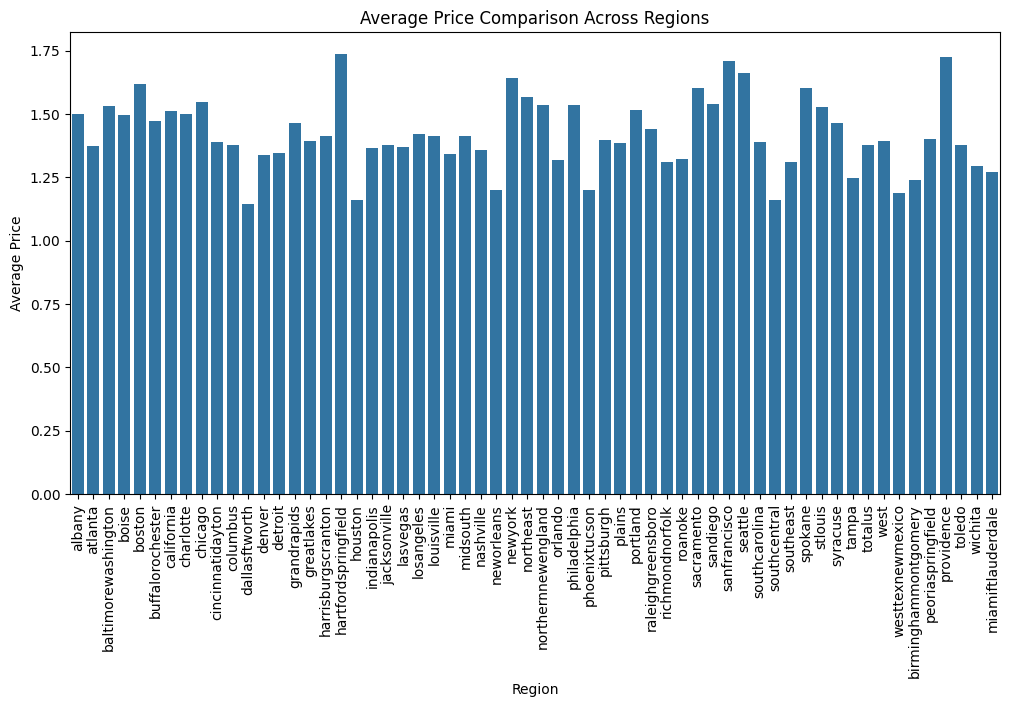

In [ ]:
# Average Price by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='AveragePrice', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Average Price Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

The bar chart shows clear differences in avocado prices across regions, with average prices ranging from approximately 0.75 to 1.75.

Regions like Harford Springfield and Providence have notably higher prices, suggesting stronger demand and potentially higher living costs. Consumers in these areas may be less sensitive to price changes, indicating a willingness to pay more for avocados.

In contrast, regions such as Dallas FT Worth and South Central have lower average prices, likely due to reduced demand or more efficient local supply chains. These areas may attract price-sensitive consumers seeking affordable options.

#### 2.3. Price Per Unit Volume Comparison by Region

Next, I will analyze the Price Per Unit Volume Comparison by Region. This analysis aims to provide insights into how the price per unit of avocado varies across different regions, which can affect consumer purchasing decisions and overall market dynamics.

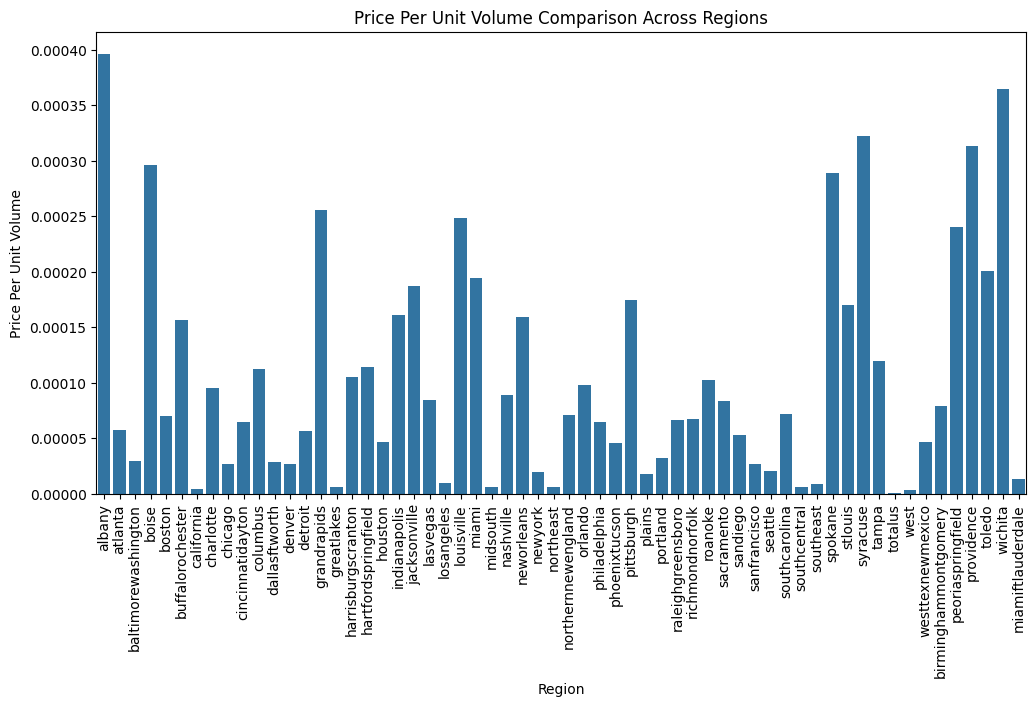

In [ ]:
# Price Per Unit Volume by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='PricePerUnitVolume', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Price Per Unit Volume Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Price Per Unit Volume')
plt.show()


The analysis of price per unit volume of avocados reveals significant variations across regions. Some areas show higher prices, indicating different market dynamics and factors influencing pricing.

High-Price Regions: Areas like Albany and Wichita have higher prices per unit volume, possibly due to transportation costs, lower local production, or higher demand. Consumers in these regions may be less price-sensitive and willing to pay more.

Low-Price Regions: Regions such as Total US and West feature lower prices per unit volume, likely due to efficient local supply chains, higher local production, or reduced demand. These markets may attract more price-sensitive consumers seeking affordable options.

#### 2.4. Sales of Specific Hass Avocado size by Region (PLU 4046, 4225, 4770)

In this section, I will analyze the Sales of Specific Hass Avocado Sizes by Region. The focus will be on three product look-up (PLU) codes: PLU 4046 (small/medium Hass avocados), PLU 4225 (large Hass avocados), and PLU 4770 (extra large Hass avocados). This analysis aims to uncover regional preferences for avocado sizes and how these preferences influence overall sales.


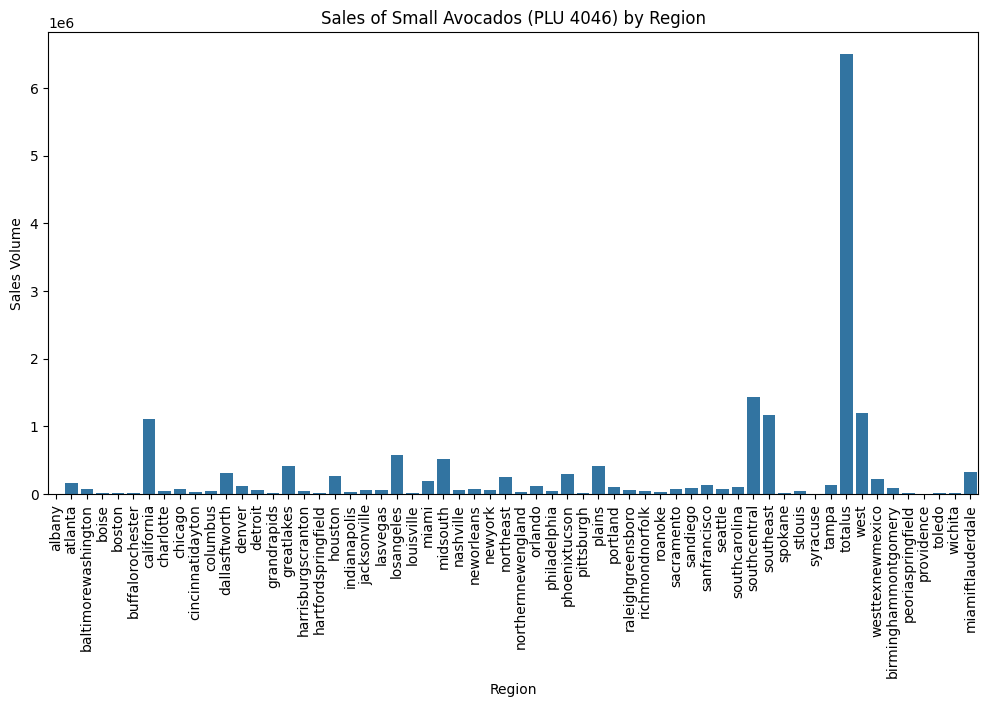

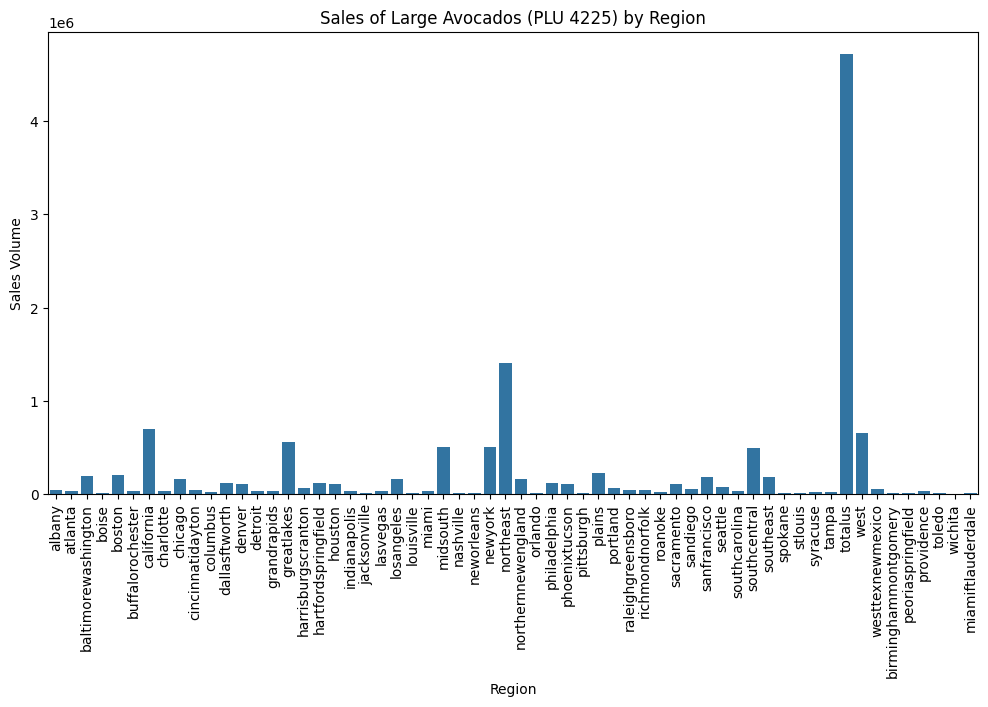

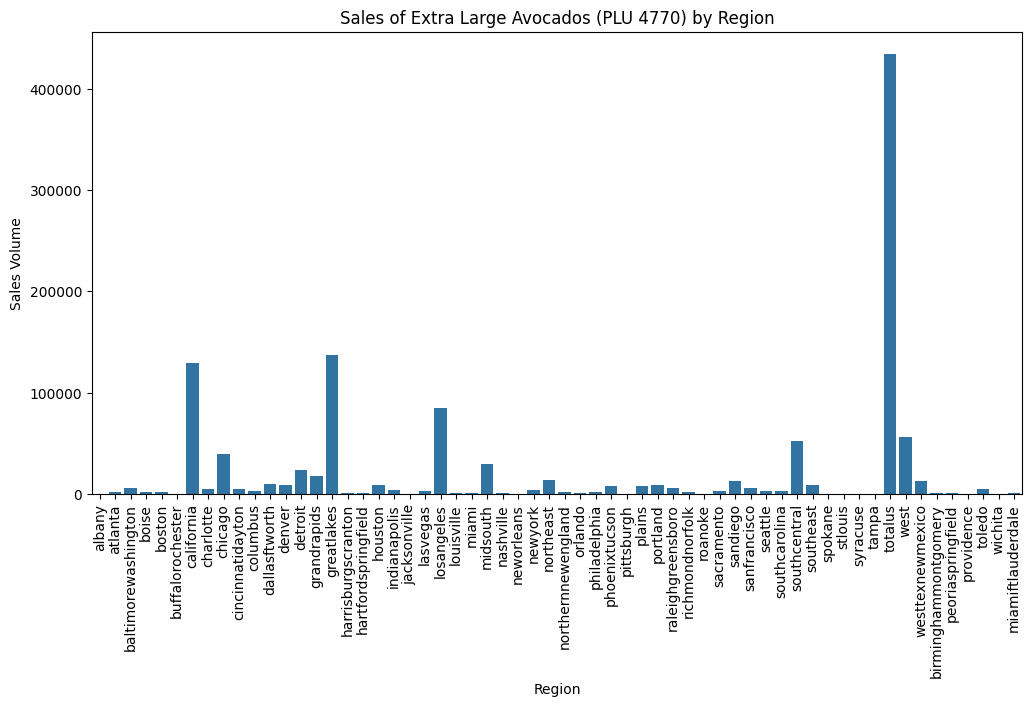

In [ ]:
# Sales of Small Avocados (PLU 4046) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4046', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Small Avocados (PLU 4046) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Large Avocados (PLU 4225) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4225', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Large Avocados (PLU 4225) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Extra Large Avocados (PLU 4770) by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='plu4770', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Extra Large Avocados (PLU 4770) by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

The analysis of avocado sales shows clear differences between regions for small/medium, large, and extra-large sizes. For small/medium Hass avocados (PLU 4046), Total US and South Central have high sales, showing strong demand. In contrast, Syracuse and Boise have much lower sales, indicating less interest in these areas.

For large Hass avocados (PLU 4225), Total US continues to lead in sales because of its local production. North east shows strong sales for this size. However, regions like Syracuse and Boise have lower sales, likely due to ineffective distribution or higher prices.

When looking at extra-large Hass avocados (PLU 4770), regions like Total Us and Great Lakes stand out with high sales, showing strong demand. Meanwhile, other regions report lower sales, possibly due to less interest or logistical issues.

In summary, Total US is a top market for all avocado sizes due to its strong production and lower shipping costs. On the other hand, Syracuse and Boise have lower sales across all sizes, likely due to less demand and higher prices, making them less appealing to consumers.

#### 2.5. Sales of Avocados in Different Bag Types by Region
Now, I will analyze the **Sales of Avocados in Different Bag Types by Region**. This analysis aims to provide insights into how the sales of avocados vary based on the type of packaging used, highlighting consumer preferences and market dynamics across different regions.


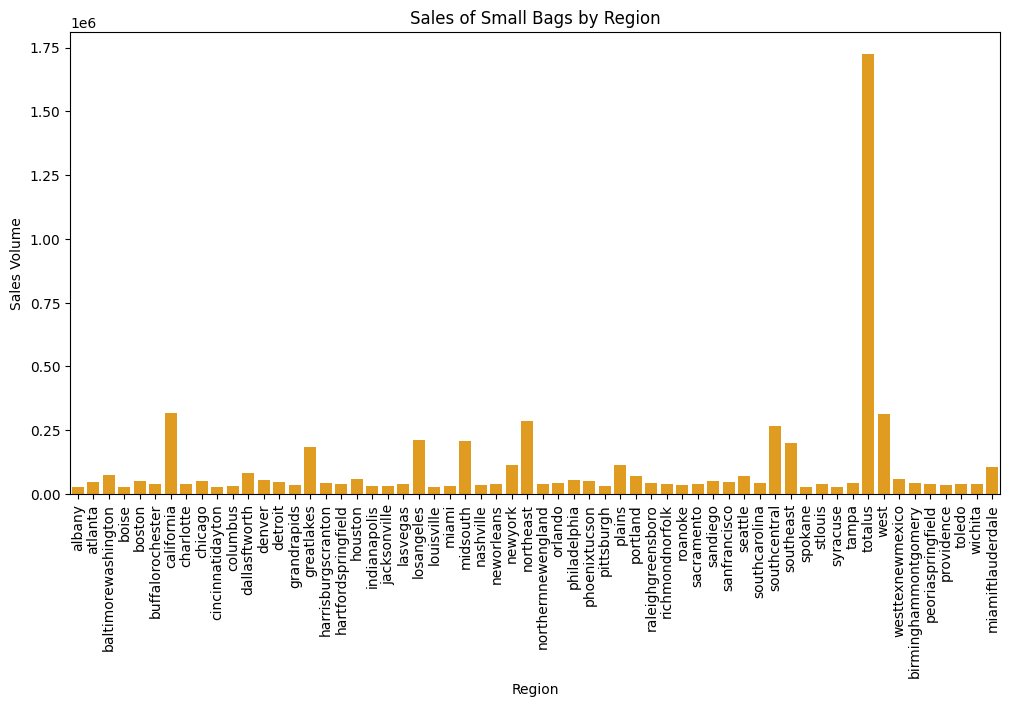

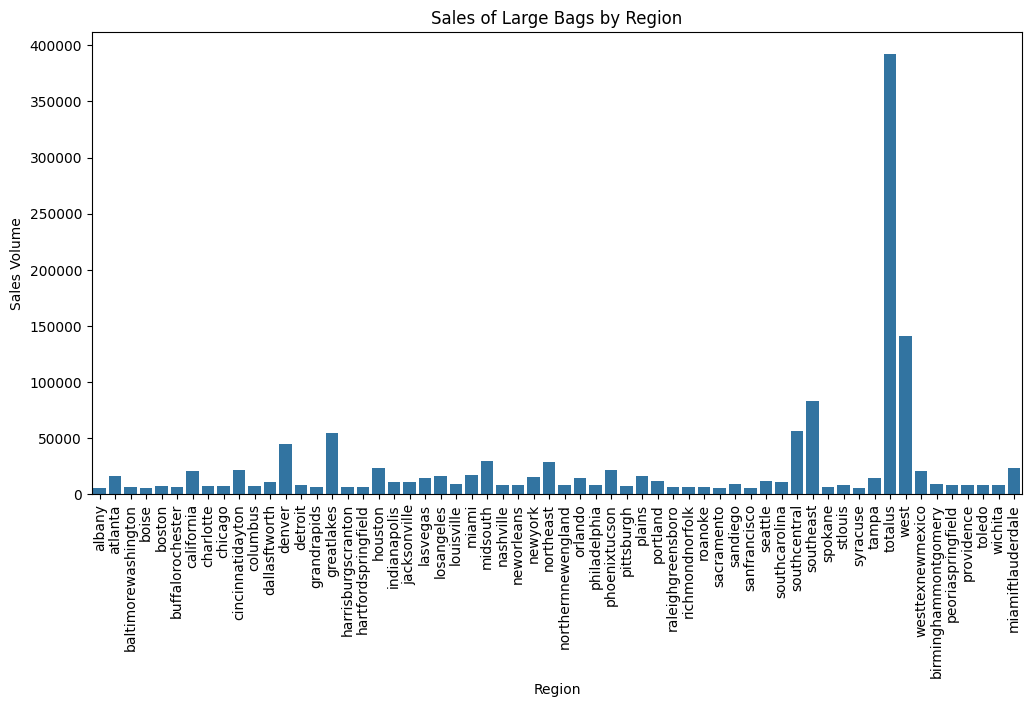

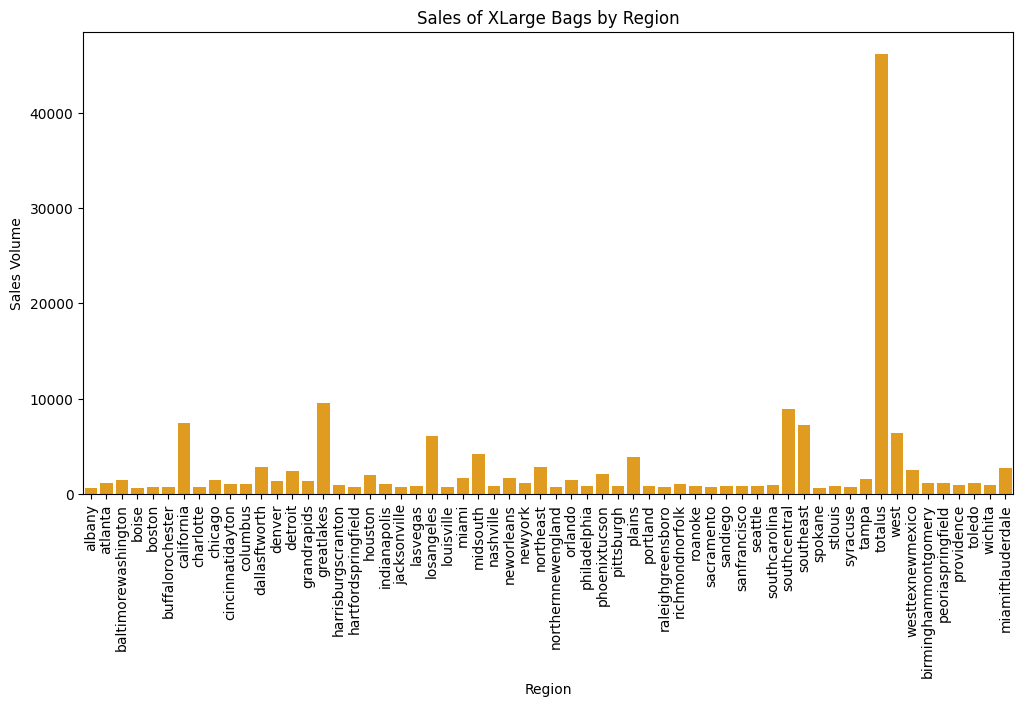

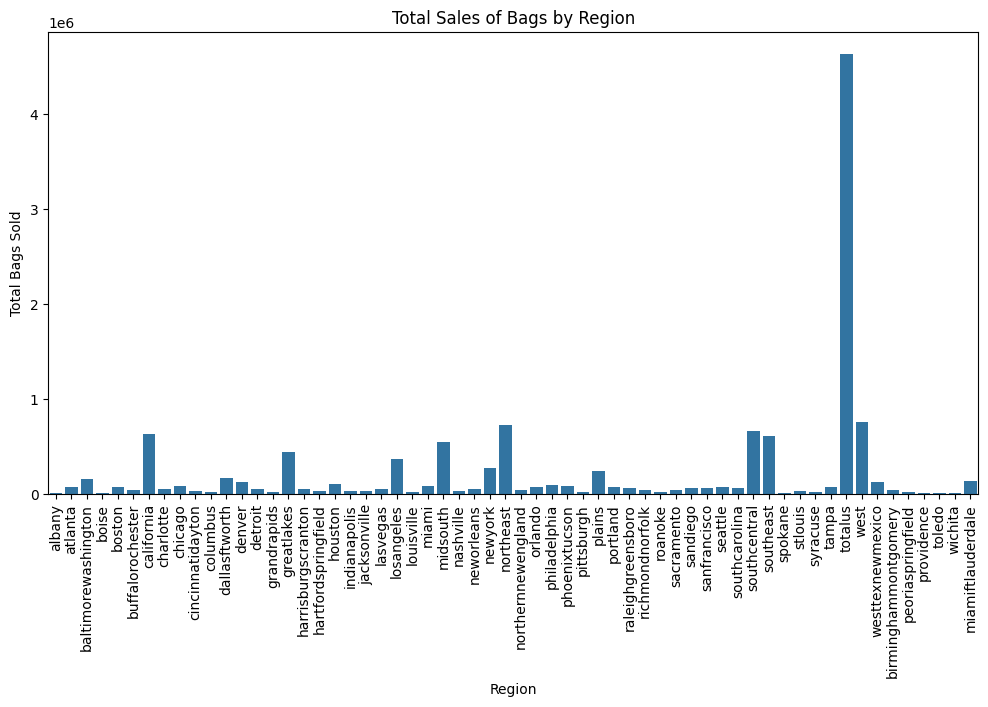

In [ ]:
# Sales of Small Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='SmallBags', data=df_clean, ci=None, color='orange')
plt.xticks(rotation=90)
plt.title('Sales of Small Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Large Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='LargeBags', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Sales of Large Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of XLarge Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='XLargeBags', data=df_clean, ci=None, color='orange')
plt.xticks(rotation=90)
plt.title('Sales of XLarge Bags by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

# Sales of Total Bags by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='TotalBags', data=df_clean, ci=None)
plt.xticks(rotation=90)
plt.title('Total Sales of Bags by Region')
plt.xlabel('Region')
plt.ylabel('Total Bags Sold')
plt.show()

The analysis of avocado sales in different bag types shows clear patterns across regions for small, large, and extra-large bags. The "Total U.S." region has the highest sales for small bags, showing strong overall demand. In contrast, Syracuse and Boise have much lower sales, indicating less interest or possible market issues.

For large bags, West Texas/New Mexico has the highest sales volume, suggesting a strong preference for this size. California also does well with large bags, likely due to good distribution strategies. However, Syracuse and Boise again show lower sales, which might be due to poor distribution or higher prices.

When it comes to extra-large bags, one region stands out with high sales, indicating strong demand. Other regions report lower sales, possibly due to less interest from consumers or logistical challenges.

In summary, the "Total U.S." region leads in small bags, while West Texas/New Mexico excels in large bags with effective distribution. California also performs well with large bags. On the other hand, Syracuse and Boise have lower sales across all bag sizes, likely due to lower demand and higher prices, making them less appealing to consumers. Now, we will move on to examining seasonal trends in avocado sales to see how the time of year affects buying behavior.

---

The regional analysis of avocado sales reveals significant variations in consumer preferences and market dynamics across different areas. Overall, Total US consistently emerges as a top market for all avocado sizes due to its strong production capabilities and lower transportation costs also indicating effective marketing strategies. However, regions like Syracuse and Boise exhibit lower sales across all sizes and bag types, likely due to less demand and higher prices. Additionally, the analysis of average prices and price per unit volume highlights differing price sensitivities among consumers in various regions, with high-price areas potentially indicating less sensitivity to cost. As we move forward, we will focus on seasonal trends in avocado sales to better understand how time of year influences consumer purchasing decisions and overall market dynamics.

---

### 3.Seasonal Sales Analysis
This section focuses on visualizing trends based on different aspects of the dataset, such as monthly sales volumes, average prices, and seasonal comparisons of avocado types. Below are the relationships we're going to explore

3.1. Monthly Total Sales Volume Over Time

3.2. Monthly Average Price Over Time

3.3. Monthly Price Per Unit Volume Over Time

3.4. Average Price and Price Per Unit Volume by Month

3.5. Monthly sales of Avocado Types

3.6. Monthly Sales of Avocados by Hass Size (PLU 4046, 4225, 4770)

3.7. Monthly Sales of Avocados by Bag Size

#### 3.1. Monthly Total Sales Volume Over Time
I'm going to start by analyzing the **Monthly Total Sales Volume Over Time**. By looking at the sales data month by month, I'll create a visual representation that shows how avocado sales change throughout the year. This analysis will help us identify peak sales periods and seasonal trends, providing insights into consumer demand and behavior.

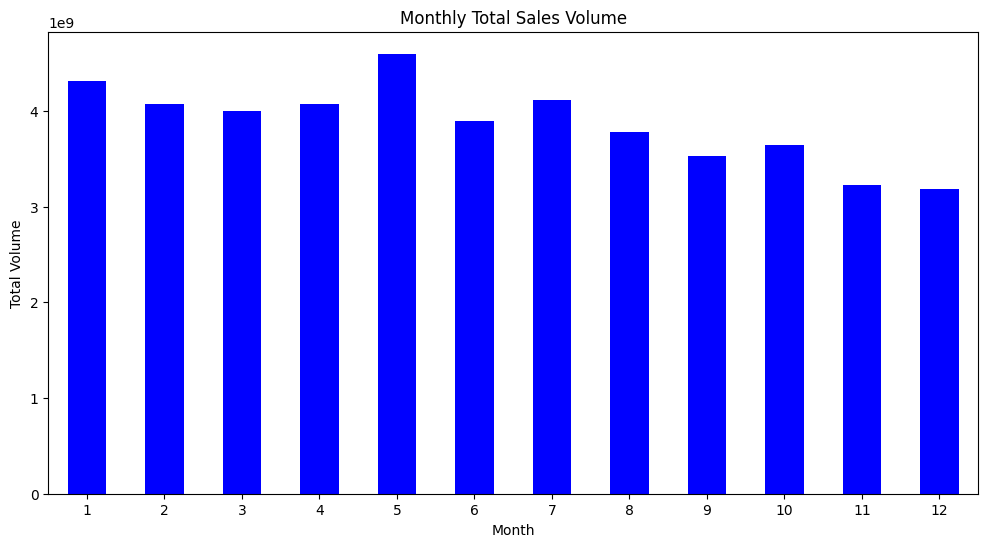

In [ ]:
# Monthly Total Sales Volume using the 'Month' column
plt.figure(figsize=(12, 6))
monthly_sales_volume = df_clean.groupby('Month')['TotalVolume'].sum()

monthly_sales_volume.plot(kind='bar', color='blue')
plt.title('Monthly Total Sales Volume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=0)
plt.show()

The analysis reveals important insights into avocado sales trends throughout the year. Peak months, including May, July, and December, show significantly higher sales volumes, indicating robust consumer demand. In the U.S., warmer weather in May and July encourages outdoor activities, leading to increased consumption of fresh produce, such as avocados in salads and barbecues. December also sees a surge in sales due to festive gatherings and holiday meals, where avocados are popular for appetizers and party dishes.

On the other hand, low months like February and September demonstrate reduced sales volumes, suggesting these periods are off-peak for avocado sales. In February, colder weather often leads to a decline in fresh salad consumption, while September marks a transition to fall, resulting in lower demand as consumers opt for heartier seasonal dishes. Recognizing these trends is crucial for planning marketing strategies and managing inventory to better align with consumer preferences.

#### 3.2. Monthly Average Price Over Time

I will now analyze the **Monthly Average Price of Avocados Over Time**. This analysis aims to reveal how the average price of avocados changes throughout the year. By examining these price fluctuations on a monthly basis, we can identify trends, seasonal pricing patterns, and periods of price volatility.

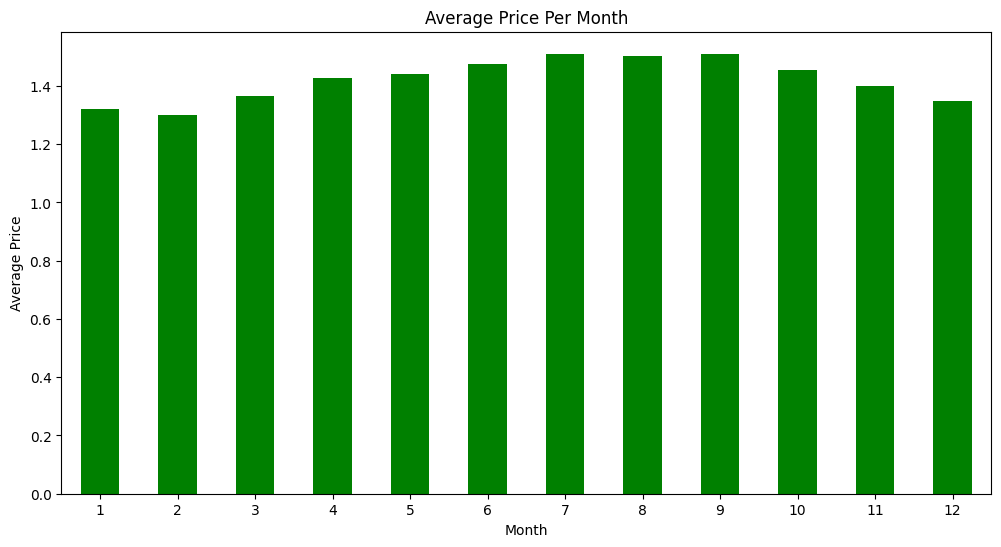

In [ ]:
# Average Price per Month
plt.figure(figsize=(12, 6))
monthly_avg_price = df_clean.groupby('Month')['AveragePrice'].mean()

monthly_avg_price.plot(kind='bar', color='green')
plt.title('Average Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


The average price of avocados ranges from about $0.80 to $1.40 per unit, with noticeable changes throughout the year. Some months, like July,August and September, have higher average prices, showing that there is more demand or less supply during these times. This could be due to seasonal trends or other market factors. On the other hand, months like January, February and December have lower average prices, which may mean there is more supply or less demand. These months could be good times for promotions or buying in bulk.

Next, we will explore Monthly Price Per Unit Volume Over Time to gain further insights into how pricing affects sales and consumer behavior throughout the year

#### 3.3. Monthly Price Per Unit Volume Over Time
I will now analyze the Monthly Price Per Unit Volume of Avocados Over Time. This analysis aims to reveal how the price per unit volume of avocados changes throughout the year. By looking at these monthly price changes, we can uncover trends, recognize seasonal patterns in pricing, and pinpoint times of significant price variations.

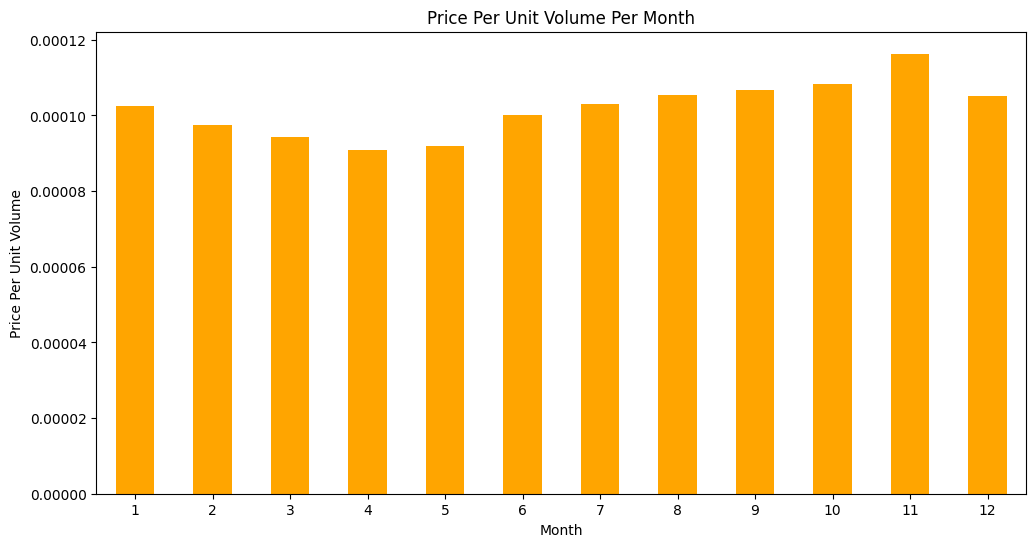

In [ ]:
# Price Per Unit Volume per Month
plt.figure(figsize=(12, 6))
monthly_price_per_unit = df_clean.groupby('Month')['PricePerUnitVolume'].mean()

monthly_price_per_unit.plot(kind='bar', color='orange')
plt.title('Price Per Unit Volume Per Month')
plt.xlabel('Month')
plt.ylabel('Price Per Unit Volume')
plt.xticks(rotation=0)
plt.show()


The bar chart above shows the price per unit volume of avocados over a 12-month period. The prices remain relatively stable throughout the year, ranging from approximately 0.00002 to 0.00012, indicating minimal fluctuations in unit price. However, there is a slight increase during the first few months of the year (January to March), while prices dip a bit from April to September. In conclusion, this suggests a seasonal trend where avocado prices tend to be slightly higher in the early and late months of the year, likely driven by factors such as reduced supply or increased demand during the winter and holiday seasons.

#### 3.4. Total Volume sold per month by Type

I will now analyze the **Total Volume of Avocados Sold Per Month by Type**. This analysis will focus on how sales trends differ between conventional and organic avocados throughout the year. By comparing the monthly sales volumes for each type, we can uncover important insights into consumer preferences, seasonal variations in demand, and how these factors influence the overall market for conventional and organic avocados.

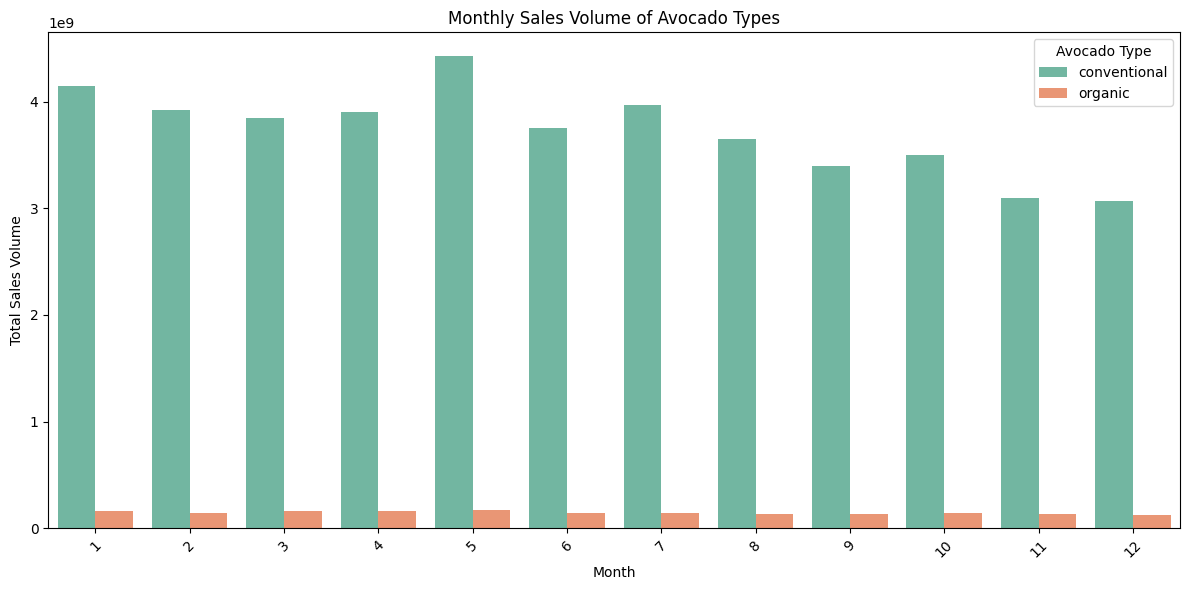

In [ ]:
# Grouping by Month and Type to get the total volume sold each month
monthly_sales_by_type = df_clean.groupby(['Month', 'type']).agg(TotalVolume=('TotalVolume', 'sum')).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Use seaborn for better aesthetics
import seaborn as sns
sns.barplot(data=monthly_sales_by_type, x='Month', y='TotalVolume', hue='type', palette='Set2')

# Adding titles and labels
plt.title('Monthly Sales Volume of Avocado Types')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Avocado Type')
plt.tight_layout()

# Show the plot
plt.show()

The  graph above shows that conventional avocados consistently sell more than organic avocados each month. This means conventional avocados are more popular in the market. Both types have some ups and downs in sales throughout the year, but conventional avocados always have much higher volumes. The biggest sales for both types happen around months 1 and 5, while the lowest sales occur in months 11 and 12. This gives us a clear idea of when avocado sales are highest and how conventional avocados dominate the market.

#### 3.5. Sales of Avocado Types by Month
I will now analyze the **Sales of Avocado Types by Month**. This analysis will break down how the sales of different types of avocados (conventional and organic) fluctuate over time. By comparing monthly sales, we can identify trends in consumer preferences and how each type performs throughout the year


<Figure size 1200x600 with 0 Axes>

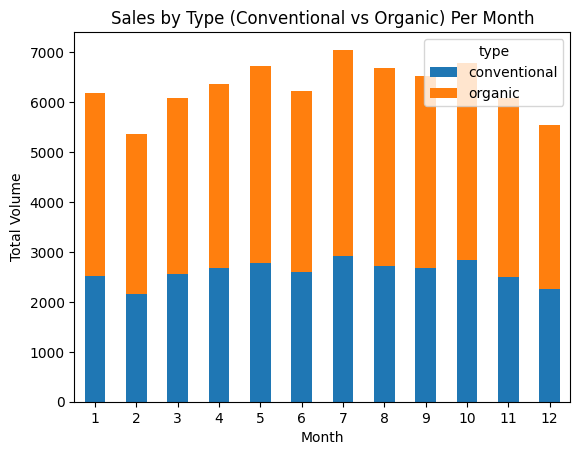

In [ ]:
# Total Volume by Type (Conventional vs Organic) across Months
plt.figure(figsize=(12, 6))
monthly_sales_by_type = df_clean.groupby(['Month', 'type'])['AveragePrice'].sum().unstack()

monthly_sales_by_type.plot(kind='bar', stacked=True)
plt.title('Sales by Type (Conventional vs Organic) Per Month')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=0)
plt.show()

The graph above shows how many conventional and organic avocados were sold each month over the year. Conventional avocados always have higher sales than organic ones, which could mean that people prefer them more or they are easier to find. Both types have ups and downs in sales, but conventional avocados sell much more each month. The highest sales happen around the middle of the year, between months 5 and 7, while the lowest sales are seen at the start and end of the year, especially in months 2, 11, and 12.

#### 3.6. Monthly Sales of Avocados by Hass Size (PLU 4046, 4225, 4770)
I will now analyze the Monthly Sales of Avocados by Hass Size, focusing on the three specific product look-up codes (PLU 4046, 4225, and 4770). This analysis aims to uncover how sales for small/medium (PLU 4046), large (PLU 4225), and extra-large (PLU 4770) avocados vary throughout the year. By examining these sales trends, we can identify which sizes are most popular among consumers during different months and understand how demand shifts across seasons.




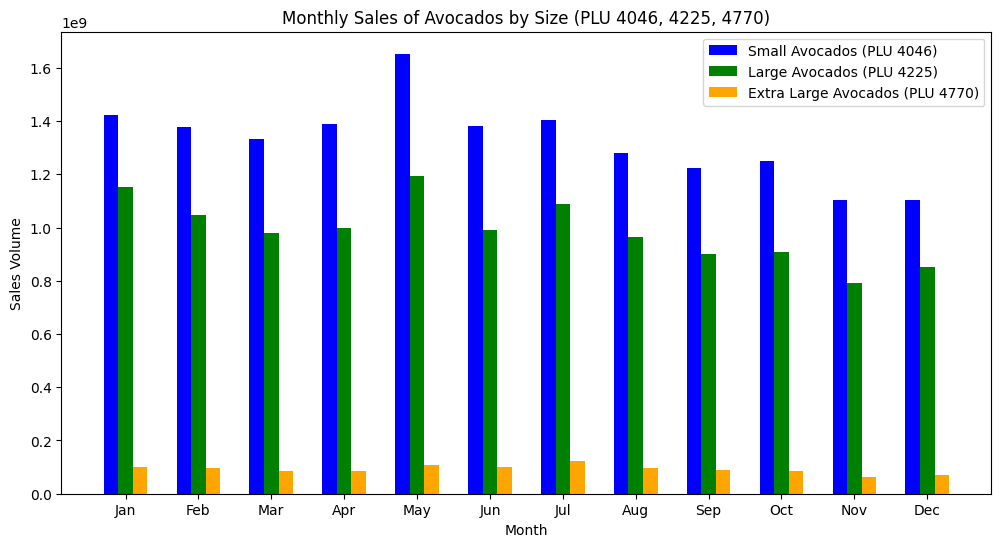

In [ ]:
# Monthly Sales of Small, Large, and Extra Large Avocados (PLU 4046, 4225, 4770)
plt.figure(figsize=(12, 6))

monthly_sales_4046 = df_clean.groupby('Month')['plu4046'].sum()
monthly_sales_4225 = df_clean.groupby('Month')['plu4225'].sum()
monthly_sales_4770 = df_clean.groupby('Month')['plu4770'].sum()

plt.bar(monthly_sales_4046.index - 0.2, monthly_sales_4046, width=0.2, label='Small Avocados (PLU 4046)', color='blue')
plt.bar(monthly_sales_4225.index, monthly_sales_4225, width=0.2, label='Large Avocados (PLU 4225)', color='green')
plt.bar(monthly_sales_4770.index + 0.2, monthly_sales_4770, width=0.2, label='Extra Large Avocados (PLU 4770)', color='orange')

plt.title('Monthly Sales of Avocados by Size (PLU 4046, 4225, 4770)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


The bar chart titled “Monthly Sales of Avocados by Size (PLU 4046, 4225, 4770)” shows how many small, large, and extra-large avocados were sold each month over the year. Small avocados (PLU 4046), shown in blue, have the highest sales in most months. Large avocados (PLU 4225), in green, have moderate sales, usually lower than small avocados but higher than extra-large avocados (PLU 4770), which are shown in orange and have the lowest sales. Small avocados have steady sales throughout the year, with a few months seeing slightly higher sales. In contrast, large and extra-large avocados have more ups and downs in sales from month to month. Overall, sales for all sizes tend to be highest in the summer months, from June to August, and drop towards the end of the year, especially in November and December.

#### 3.7. Monthly Sales of Avocados by Bag Size
Finally, I will analyze the monthly sales of avocados based on different bag sizes, specifically small, large, and extra-large bags. This analysis will help us understand how consumer preferences vary with packaging and how these trends change over time.

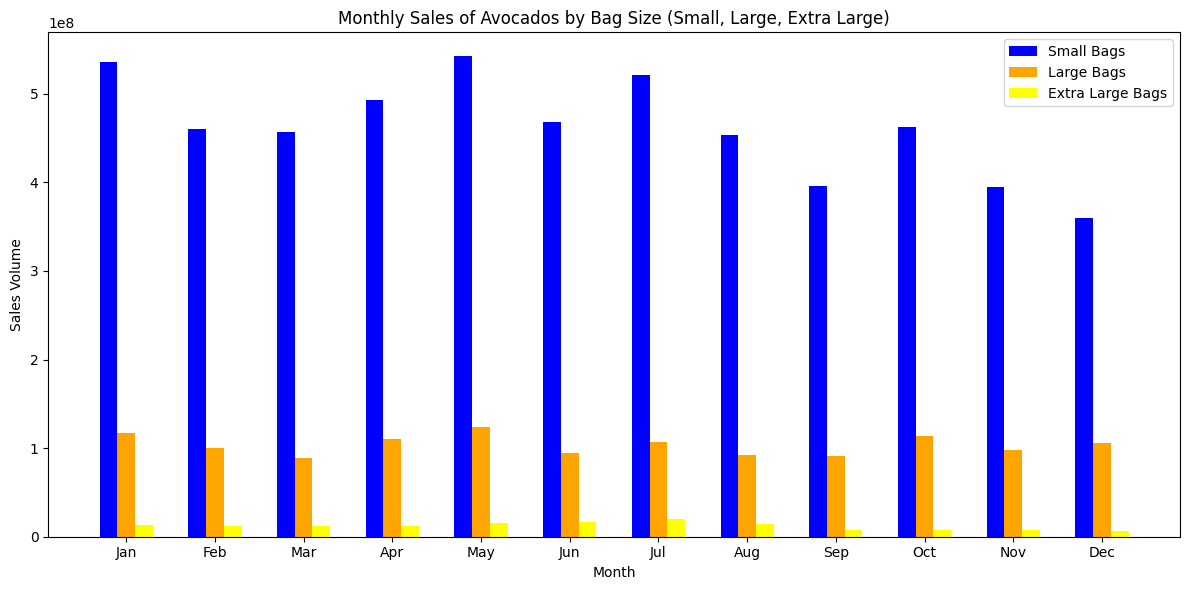

In [ ]:
# Monthly Sales of Small, Large, and Extra Large Bags of Avocados
plt.figure(figsize=(12, 6))

# Group by 'Month' and sum the sales of different bag types
monthly_sales_small_bags = df_clean.groupby('Month')['SmallBags'].sum()
monthly_sales_large_bags = df_clean.groupby('Month')['LargeBags'].sum()
monthly_sales_xlarge_bags = df_clean.groupby('Month')['XLargeBags'].sum()

# Plotting the bar chart for the different bag sizes
plt.bar(monthly_sales_small_bags.index - 0.2, monthly_sales_small_bags, width=0.2, label='Small Bags', color='blue')
plt.bar(monthly_sales_large_bags.index, monthly_sales_large_bags, width=0.2, label='Large Bags', color='orange')
plt.bar(monthly_sales_xlarge_bags.index + 0.2, monthly_sales_xlarge_bags, width=0.2, label='Extra Large Bags', color='yellow')

# Adding titles and labels
plt.title('Monthly Sales of Avocados by Bag Size (Small, Large, Extra Large)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


The graph above compares the sales volumes of avocados in different bag sizes throughout the year. Small bags, shown in blue, have the highest sales in most months. Large bags, represented by orange bars, have moderate sales, typically lower than small bags but higher than extra-large bags, which are shown in yellow and have the lowest sales all year. Small bags maintain steady sales with a few months having slightly higher sales. In contrast, large and extra-large bags experience more ups and downs in their sales volumes. Overall, sales for all bag sizes tend to peak during the summer months, from June to August, and decrease towards the end of the year, particularly in November and December.

---
Overall, the analysis of avocado sales reveals several important seasonal insights. Sales volumes peak in May, July, and December, driven by warmer weather in May and July that encourages outdoor eating and fresh produce consumption, while December sees increased sales due to holiday gatherings and festive meals. Conversely, sales drop in February and September, as the cold weather in February reduces interest in fresh salads, and September marks a transition from summer to fall, leading to lower demand for avocados. Pricing trends also fluctuate throughout the year, with higher average prices in May and December, likely due to increased demand or reduced supply, while February and September often feature lower prices, indicating higher supply or lower demand, which could be advantageous for promotions. Additionally, sales of small bags consistently outperform those of large and extra-large bags, with summer months showing significant peaks. In terms of type, conventional avocados dominate sales compared to organic options, highlighting a stronger consumer preference for conventional products.

---

### 4. More Analysis

#### 4.1. Correlation Analysis

To investigate price sensitivity, I’ll analyze the correlation between average prices and sales volumes. A strong negative correlation would suggest that as prices rise, sales volumes decrease, indicating that consumers are price-sensitive.


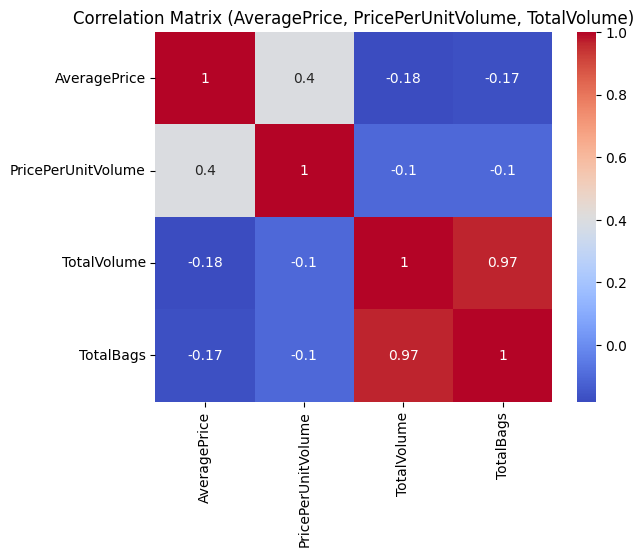

In [ ]:
corr_matrix = df_clean[['AveragePrice', 'PricePerUnitVolume', 'TotalVolume','TotalBags']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (AveragePrice, PricePerUnitVolume, TotalVolume)')
plt.show()

There is a moderate positive correlation (0.4) between average price and price per unit volume, meaning that as the price per unit increases, the average price tends to go up too. However, the average price has a weak negative correlation (-0.18) with total volume sold, suggesting that higher prices might lead to slightly lower sales. This trend is similar for total bags sold, which has a weak negative correlation (-0.17) with average price. For price per unit volume, there is also a weak negative correlation (-0.1) with both total volume and total bags sold, indicating that higher prices could mean fewer sales. On the other hand, there is a very strong positive correlation (0.97) between total volume sold and the number of bags sold, which shows that when more avocados are sold, more bags are used. Overall, the weak negative correlations suggest that higher prices can reduce sales, while the strong positive correlation highlights that as sales volume increases, the number of bags used also increases.

#### 4.2. Trend Analysis


4.2.1. Long-Term Trends

This section assess how avocado prices and sales volumes have changed over the years, helping to identify long-term shifts in consumer behavior or economic impacts, firstly we group the data by year and then calculate the sum of the total sales volume and the average of the average price. Here’s the code for that:

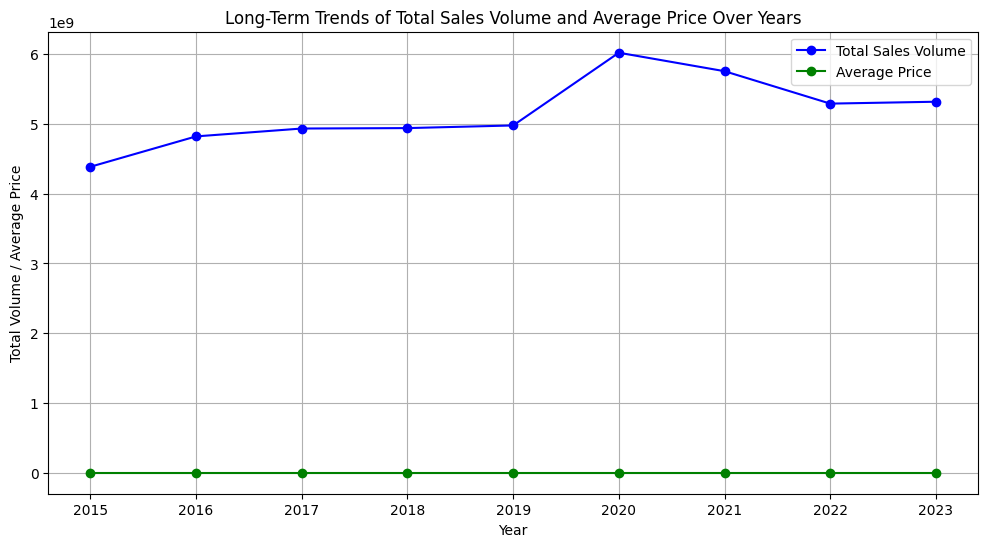

In [ ]:
# Grouping by Year to analyze long-term trends
yearly_trends = df_clean.groupby('Year').agg({'TotalVolume': 'sum', 'AveragePrice': 'mean'}).reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['Year'], yearly_trends['TotalVolume'], marker='o', label='Total Sales Volume', color='blue')
plt.plot(yearly_trends['Year'], yearly_trends['AveragePrice'], marker='o', label='Average Price', color='green')

plt.title('Long-Term Trends of Total Sales Volume and Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Total Volume / Average Price')
plt.legend()
plt.grid()
plt.show()


The graph shows avocado sales and prices from 2015 to 2022. The blue line represents total sales volume, which goes up and down over the years. There are clear high points and low points, but overall, sales volume stays above the middle level. The green line shows the average price, which remains stable throughout the years and stays below the middle level, meaning prices haven't changed much.

The changes in total sales volume might be affected by things like seasonal demand, market conditions, and supply chain issues. By looking at the years with the highest and lowest sales, we can learn what caused these changes, such as promotions, economic situations, or shifts in what consumers want. The steady average price indicates that the avocado market is stable, which is good for both buyers and sellers because it leads to predictable prices.

4.1.2. Rolling Averages

Calculating rolling averages helps smooth out fluctuations in the data and reveal underlying trends. I'll use a 3-month window for the rolling average to balance responsiveness and stability. By applying this calculation to the total sales volume and average price, I can visualize the trends over time. This will help me identify any significant patterns or shifts in the data, enhancing my analysis of avocado sales.

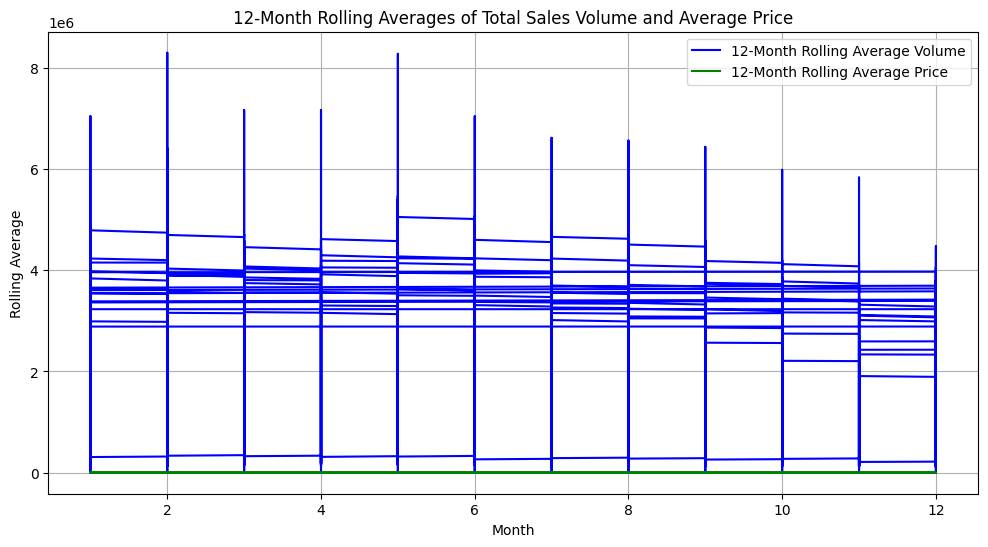

In [ ]:
# Calculating rolling averages
df_clean['RollingAverageVolume'] = df_clean['TotalVolume'].rolling(window=12).mean()
df_clean['RollingAveragePrice'] = df_clean['AveragePrice'].rolling(window=12).mean()

# Plotting the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Month'], df_clean['RollingAverageVolume'], label='12-Month Rolling Average Volume', color='blue')
plt.plot(df_clean['Month'], df_clean['RollingAveragePrice'], label='12-Month Rolling Average Price', color='green')

plt.title('12-Month Rolling Averages of Total Sales Volume and Average Price')
plt.xlabel('Month')
plt.ylabel('Rolling Average')
plt.legend()
plt.grid()
plt.show()


The line graph titled “12-Month Rolling Averages of Total Sales Volume and Average Price” shows the trends in avocado sales and prices over the year. The blue line represents the 12-month rolling average volume, which fluctuates with noticeable peaks and dips, indicating times of higher and lower sales. Overall, the volume stays around the middle of the y-axis(4), showing moderate variability. The green line represents the 12-month rolling average price, which also varies but remains constant over the months, suggesting that avocado prices are on the rise.

These fluctuations in sales volume indicate that avocado sales follow cyclical patterns, likely influenced by seasonal demand, market conditions, or other outside factors. By looking at the specific months when sales peak or drop, we can better understand what drives these changes, such as promotions, economic conditions, or shifts in consumer preferences. The upward trend in average prices indicates that the avocado market has been experiencing higher prices throughout the year, possibly due to increased demand, changes in supply chains, or inflation.

#### 4.3. Monthly Sales Volume and Average Price Over Time

In this section, I will analyze the trends in avocado sales volume over time, specifically from 2015 to 2023. By creating a time series plot, we can visualize how the total sales volume of avocados has changed throughout these years.

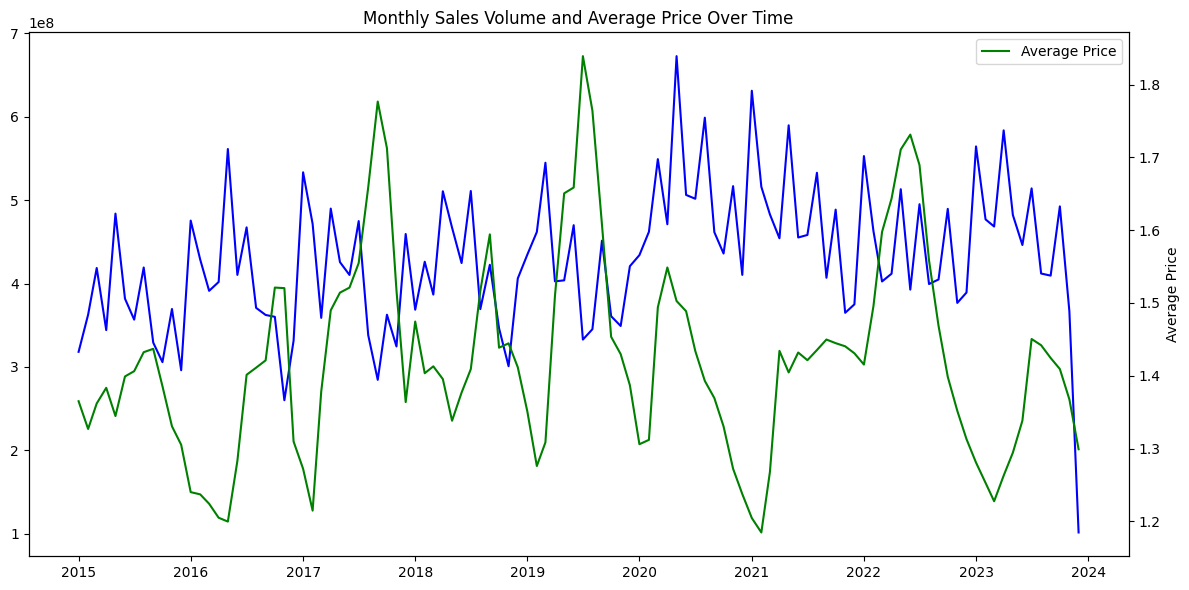

In [ ]:
# Group by Year and Month to aggregate TotalVolume and AveragePrice
monthly_data = df_clean.groupby(['Year', 'Month']).agg(
    TotalVolume=('TotalVolume', 'sum'),
    AveragePrice=('AveragePrice', 'mean')
).reset_index()

# Create a combined Month-Year column for easier plotting
monthly_data['Month-Year'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(12, 6))

# Total Sales Volume
plt.plot(monthly_data['Month-Year'], monthly_data['TotalVolume'], label='Total Sales Volume', color='blue')

# Average Price (using secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['Month-Year'], monthly_data['AveragePrice'], label='Average Price', color='green')

# Titles and Labels
plt.title('Monthly Sales Volume and Average Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Volume')
ax2.set_ylabel('Average Price')

# Legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

The observations about avocado sales and prices show that the monthly sales volume, shown by the blue line, varies a lot with clear peaks and dips. This means that sales can go up and down throughout the year, reflecting changes in demand and other factors. Overall, the sales volume tends to stay around the middle of the left y-axis scale, indicating moderate changes. On the other hand, the average price, shown by the green line, also varies but generally trends upward over time, increasing from about 1.2 to 1.8 on the right y-axis scale. This suggests that the average price of avocados has been gradually going up.

The ups and downs in monthly sales volume indicate that avocado sales are affected by seasonal demand, market conditions, and other factors. Looking at specific months with peaks and dips can help us understand why these changes happen, like special promotions or shifts in what consumers want. Additionally, the upward trend in average price suggests that avocado prices have been rising over the years, which could be due to higher demand, changes in how avocados are supplied, or inflation.

#### 4.4 Word Cloud of Avocado Sales by Region

In this section we create a visual representation that displays the volume of avocado sales across various regions. In this visualization, the names of regions are shown in different font sizes, where larger names indicate higher sales volumes. This means that regions with significant avocado sales will appear more prominently, making it easy to identify which areas are the biggest consumers of avocados at a glance.

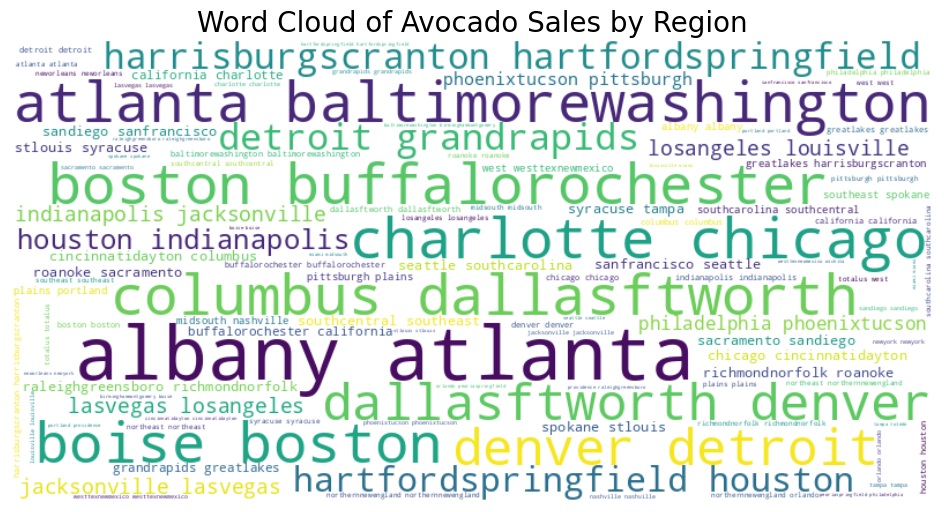

In [ ]:
# Create a string of all region names
regions_text = ' '.join(df_clean['region'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(regions_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Avocado Sales by Region', fontsize=20)
plt.show()


The word cloud above visually displays avocado sales volumes across various regions, revealing key insights into market concentration and regional preferences. Prominent areas such as **Los Angeles**, **Chicago**, and **Dallas** are highlighted, indicating they have the highest avocado sales volumes, likely due to their larger populations and market access. Other significant markets include **Atlanta**, **San Francisco**, **Seattle**, **Phoenix**, **Houston**, and **Denver**, which also show substantial sales. Conversely, regions with smaller font sizes, like **St. Louis**, **Syracuse**, and **Spokane**, suggest lower sales volumes. This distribution indicates that avocado consumption is widespread across the country, with major metropolitan areas leading the demand. The findings also suggest potential for market expansion in smaller regions through targeted marketing strategies to boost sales. Collectively, these key cities represent a large portion of avocado sales in the United States and likely account for a significant part of the "Total US" sales due to their larger populations and demand for avocados.

---
In this section, I explored the avocado sales data to understand consumer preferences, market trends, and seasonal changes across different regions. The analysis showed that the Total US market has the highest sales due to strong production and good marketing strategies, while places like Syracuse and Boise have lower sales because of less demand and higher prices.

I found that avocado sales peak in May, July, and December, driven by warm weather and holiday celebrations, while sales drop in February and September. Prices also varied throughout the year; they were higher during busy months and lower during quieter times, which could be good for promotions.

Sales of small bags of avocados consistently did better than larger sizes, and most consumers preferred conventional avocados over organic ones. I also noticed a weak negative relationship between average prices and sales volumes, meaning that when prices go up, sales might go down a little.

Long-term trends from 2015 to 2023 showed that while sales fluctuated, average prices stayed mostly stable, giving insights into how consumers behave and market conditions. By looking at 3-month rolling averages, I could see clearer patterns, leading to a time series plot that showed changes in sales and average prices over the months. This overall analysis helps us better understand what influences avocado sales over time. The next step is forecasting sales based on the patterns and trends I've uncovered.

---

<a id="six"></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

Modeling involves creating a mathematical representation of a system, process, or relationship using empirical data. This process encompasses various steps and techniques aimed at understanding, predicting, and optimizing outcomes based on available information. The primary purposes of modeling include forecasting future outcomes—such as predicting avocado sales based on historical patterns—uncovering relationships between variables—like how price, seasonality, and region influence avocado sales—and finding optimal solutions, such as determining the best pricing strategies to maximize sales. There are different types of models, including descriptive models that summarize data characteristics through metrics like mean and median, predictive models that forecast future data points using approaches like linear regression and time series forecasting (e.g., ARIMA, XGBoost, and Random Forest), and prescriptive models that suggest actions to achieve desired outcomes, such as recommending optimal inventory levels based on demand forecasts.

Process:

1. Data Preparation
2. Model Selection
3. Model Training and Evaluation


#### 1. Data Preparation:
Cleaning and transforming the data to ensure it is suitable for modeling. This may include handling missing values, encoding categorical variables, and scaling numerical features.

In this case i will only scale numerical features.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
features = df_clean[['AveragePrice','Month', 'Year']]
scaler = StandardScaler()

# Fit the scaler and transform the features
features_scaled = scaler.fit_transform(features)

# Create a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=df_clean.index)

# Include the target variable (TotalVolume) for training models
data_scaled = pd.concat([df_clean[['TotalVolume']], features_scaled_df], axis=1)


#### 2.Model Selection

Choosing the appropriate modeling technique based on the problem at hand, the nature of the data, and the desired outcome.For this analysis, i am going to use the following models:

A. `Baseline Model` a Naive Forecast as a baseline model, where the forecast for each future period is simply the last observed value.

B. `ARIMA (AutoRegressive Integrated Moving Average):` Suitable for time series forecasting, capturing trends and seasonality in the data.

c. `Linear Regression:` A simple yet effective method to analyze the relationship between sales and various independent features.

D. `Random Forest`: An ensemble learning method that uses multiple decision trees,can be used for forecasting and it is useful for capturing non-linear relationships in the data.

E. `XGBoost:` Gradient boosting algorithms that can be adapted for time series forecasting.Good for capturing non-linear relationships and interactions in your data.



#### 3. Training and evaluation
involves using historical data to train predictive models, allowing them to learn underlying patterns. After training, model evaluation assesses performance using metrics like RMSE, MAE, and R² to determine how well the model generalizes to unseen data and identify areas for improvement.

Well, for this analysis, I am going to use the `RMSE` because it effectively measures how accurate my forecasting model is in predicting avocado sales. RMSE helps highlight larger prediction errors, which is crucial for avoiding inventory problems and revenue loss. Since it is expressed in the same units as avocado sales, it makes it easy to understand how close the predictions are to actual sales figures. Additionally, RMSE allows for straightforward comparisons between different models, such as ARIMA, XGBoost, and Random Forest, to identify the best approach for capturing sales patterns. Minimizing RMSE is key to improving forecasting accuracy and optimizing inventory management strategies for avocado sales.

**A. Baseline Model**

Baseline Model RMSE (Naive Forecast): 1841843.1415859694


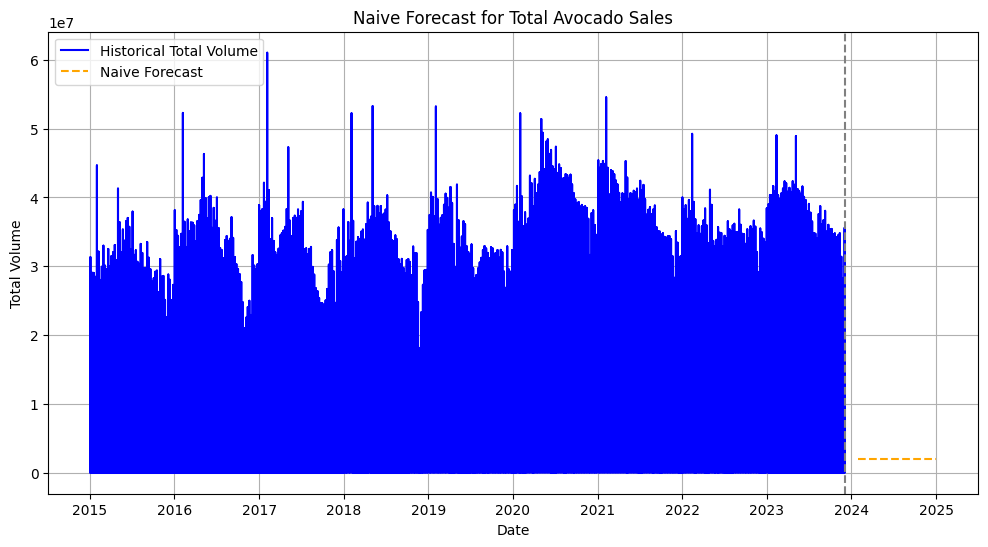

In [ ]:
# Load the dataset
data = df_clean.copy()

# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime format
data.set_index('Date', inplace=True)         # Set 'Date' as the index

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Define the number of periods for the forecast (e.g., forecasting the next 12 months)
forecast_period = 12

# Create a naive forecast: using the last observed value for all future forecasts
last_value = data['TotalVolume'].iloc[-1]
naive_forecast = np.repeat(last_value, forecast_period)

# Create future dates for plotting the forecast
# Since we have a proper datetime index, this will now work
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')

# Calculate RMSE as a performance metric
# For baseline, we'll compare the forecast to the last 'forecast_period' number of actual observations
actual = data['TotalVolume'][-forecast_period:]  # Use last `forecast_period` months for comparison
rmse_naive = np.sqrt(mean_squared_error(actual, naive_forecast[:len(actual)]))
print(f'Baseline Model RMSE (Naive Forecast): {rmse_naive}')

# Plot the historical data and the naive forecast
plt.figure(figsize=(12, 6))
plt.plot(data['TotalVolume'], label='Historical Total Volume', color='blue')
plt.plot(future_dates, naive_forecast, label='Naive Forecast', color='orange', linestyle='--')
plt.title('Naive Forecast for Total Avocado Sales')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.axvline(x=data.index[-1], color='gray', linestyle='--')  # Line to indicate end of historical data
plt.legend()
plt.grid()
plt.show()

The graph illustrates a simple forecast for total avocado sales from 2015 to 2025. The blue line represents the actual historical data up until early 2021, showing clear fluctuations with periodic spikes that indicate a seasonal pattern in avocado sales. The orange dashed line shows the naive forecast, which assumes that future sales will remain the same as the last observed point. As a result, the forecast is flat, with no expected changes in sales.

The accuracy of this forecast is measured using the RMSE (Root Mean Square Error), which is approximately 1,841,843. This high value indicates that the forecast significantly deviates from the actual sales figures. One key observation is that while the historical data shows clear seasonality, the naive forecast does not account for these trends, making it less accurate for predicting future sales.

To improve the accuracy of the forecast, I will now explore a more sophisticated forecasting model, namely Linear Regression, which can analyze the relationship between sales and various independent features, helping to capture trends in the data.

**B. Linear Regression Mode**


Root Mean Squared Error (RMSE): 3394156.264830811


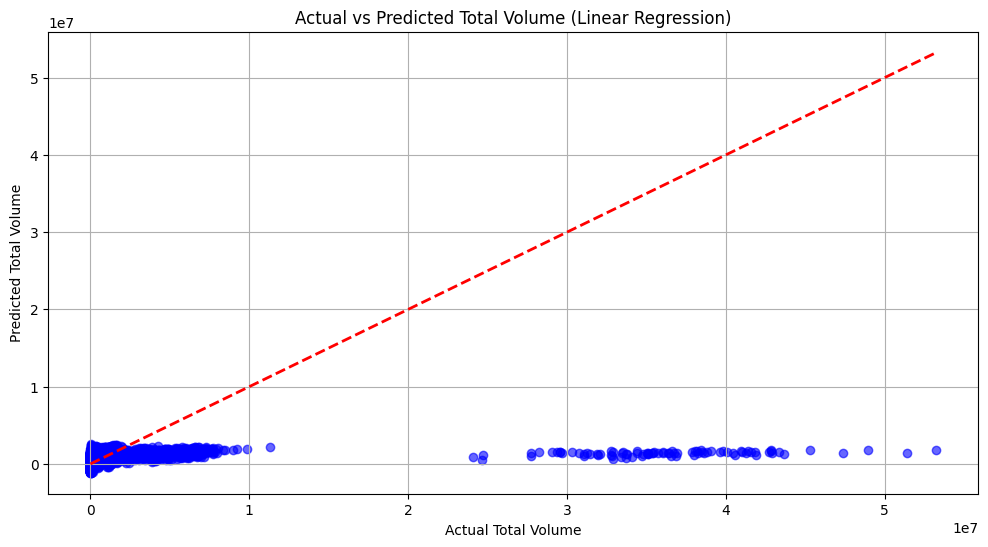

In [ ]:
# Load the pre-scaled dataset
data_scaled = pd.concat([df_clean[['TotalVolume']], features_scaled_df], axis=1)

# Selecting features and target variable
X = data_scaled[['AveragePrice', 'Month', 'Year'] + [col for col in data_scaled.columns if 'Region_' in col]]
y = data_scaled['TotalVolume']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. TRAINING PHASE

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2. EVALUATION PHASE

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (Linear Regression)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()


The graph shows how a linear regression model predicts avocado sales compared to the actual sales. In the scatter plot, the actual sales are on the x-axis, and the predicted sales are on the y-axis. Many points are close to the origin, meaning both actual and predicted sales are often low. The red dashed line represents the model’s predictions, and it shows a positive relationship between actual and predicted sales, especially for higher sales amounts.

The model’s accuracy is measured using the RMSE, which is around 3,391,562. This means the model’s predictions are off by a large margin on average. The model works well for larger sales but struggles with lower sales. The high RMSE suggests there is room for improvement.

To improve accuracy and capture non-linear relationships in the data, I will now use a more complex model: **Random Forest**. This model can help reduce prediction errors and better fit the data.

**C. Random Forest**

Root Mean Squared Error (RMSE) for Random Forest: 696399.0594718038


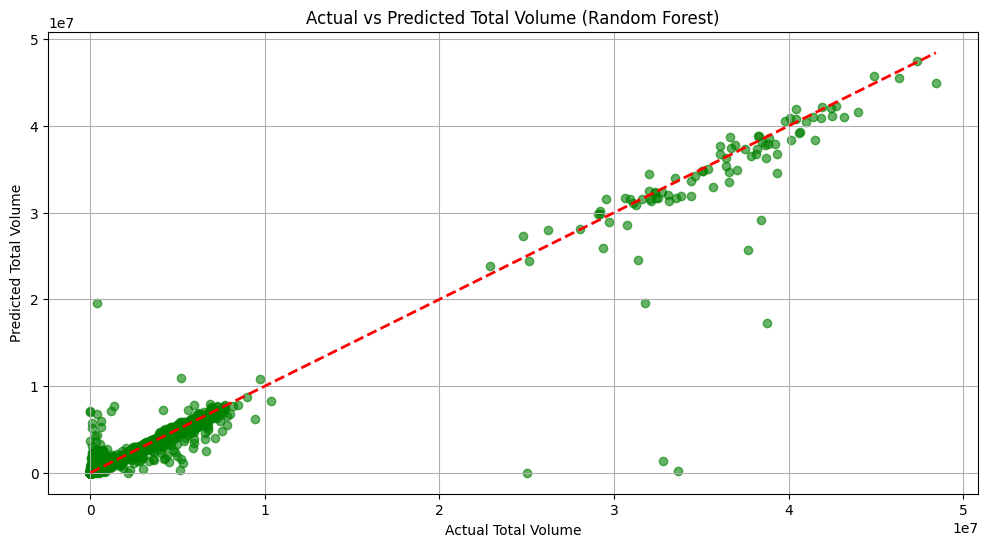

In [ ]:
# Load the dataset (using the already scaled version)
data = data_scaled.copy()  # Use the scaled DataFrame you created earlier

# Create lagged features
for i in range(1, 13):  # Creating 12 lagged features for the last year
    data[f'lag_{i}'] = data['TotalVolume'].shift(i)

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Define features and target variable
X = data[[f'lag_{i}' for i in range(1, 13)] + ['AveragePrice', 'Month', 'Year']]
y = data['TotalVolume']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the standardized data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Root Mean Squared Error (RMSE) for Random Forest: {rmse_rf}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (Random Forest)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()


The graph above shows a scatter plot comparing the actual total volume of avocados to the predicted total volume using a Random Forest model. The plot features a red dashed line that represents perfect prediction accuracy, so the closer the green dots (individual predictions) are to this line, the more accurate the model is. The Root Mean Squared Error (RMSE) for the model is about 696,399, which indicates how much the predicted values differ from the actual values on average. Overall, the scatter plot reveals that most predictions are reasonably close to the actual values, although there are some deviations, particularly at higher sales volumes.

Now, I will move on to using XGBoost, which is a powerful gradient boosting algorithm known for its effectiveness in capturing complex relationships in data and improving prediction accuracy. This model will help further refine the forecasts for total avocado sales.








**D. XGBOOST**

Root Mean Squared Error (RMSE) for XGBoost: 671326.4406737887


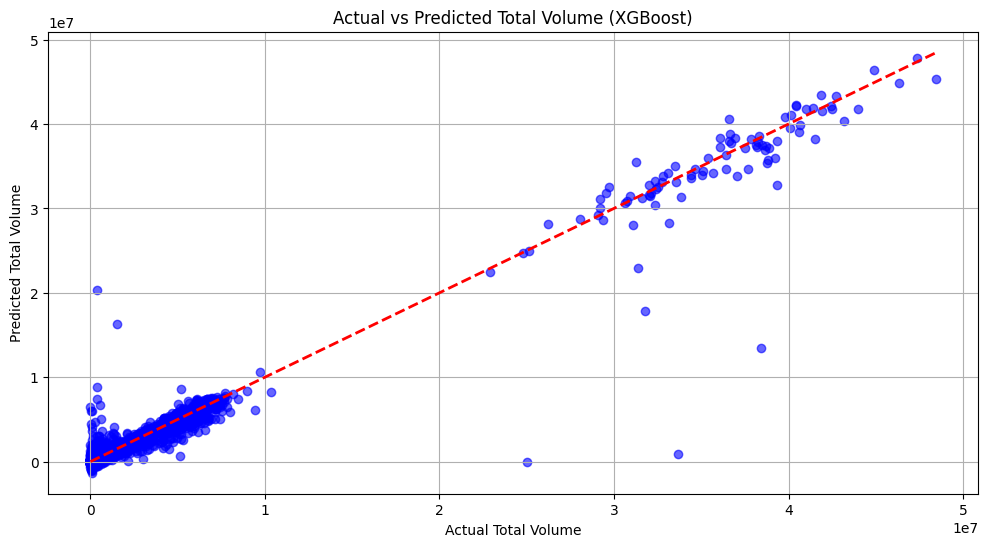

In [ ]:
# Load the dataset (using the scaled version)
data = data_scaled.copy()  # Use the scaled DataFrame you created earlier

# Create lagged features
for i in range(1, 13):  # Creating 12 lagged features for the last year
    data[f'lag_{i}'] = data['TotalVolume'].shift(i)

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Define features and target variable
X = data[[f'lag_{i}' for i in range(1, 13)] + ['AveragePrice', 'Month', 'Year']]
y = data['TotalVolume']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the standardized data
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error (RMSE) for XGBoost: {rmse_xgb}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Total Volume (XGBoost)')
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.grid()
plt.show()

The graph displays an XGBoost model comparing actual avocado sales volumes to predicted values. In the scatter plot, actual volumes are on the x-axis and predicted volumes on the y-axis, with most points clustered around the diagonal line, indicating good prediction accuracy. The red dashed line represents the trend of the predictions and shows a strong correlation between actual and predicted volumes.

The Root Mean Squared Error (RMSE) for this model is about 671,326, which is lower than previous models, suggesting that the XGBoost model offers more accurate predictions. Overall, the model performs well, with many data points closely aligned with the ideal scenario, indicating its effectiveness in predicting total avocado sales volumes.

Now, I will move on to using ARIMA, which is a well-suited model for time series forecasting. This model will help capture the trends and seasonality in the avocado sales data, allowing for potentially more accurate predictions.

**E. ARIMA Model**

Duplicates found in the Date index. Removing duplicates.
ADF Statistic: -3.8382298345043924
p-value: 0.002539519898207944
The time series is stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:            TotalVolume   No. Observations:                  466
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5290.679
Date:                Fri, 04 Oct 2024   AIC                          10587.358
Time:                        10:27:44   BIC                          10599.784
Sample:                             0   HQIC                         10592.249
                                - 466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1845      0.052     -3.535      0.000      -0.287      -0.082
ma.L1         -0.6468      0.040    -16.139      0.000      -0.725      -0.568
sigma2      4.538e+08   3.59e-11   1.27e+19      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



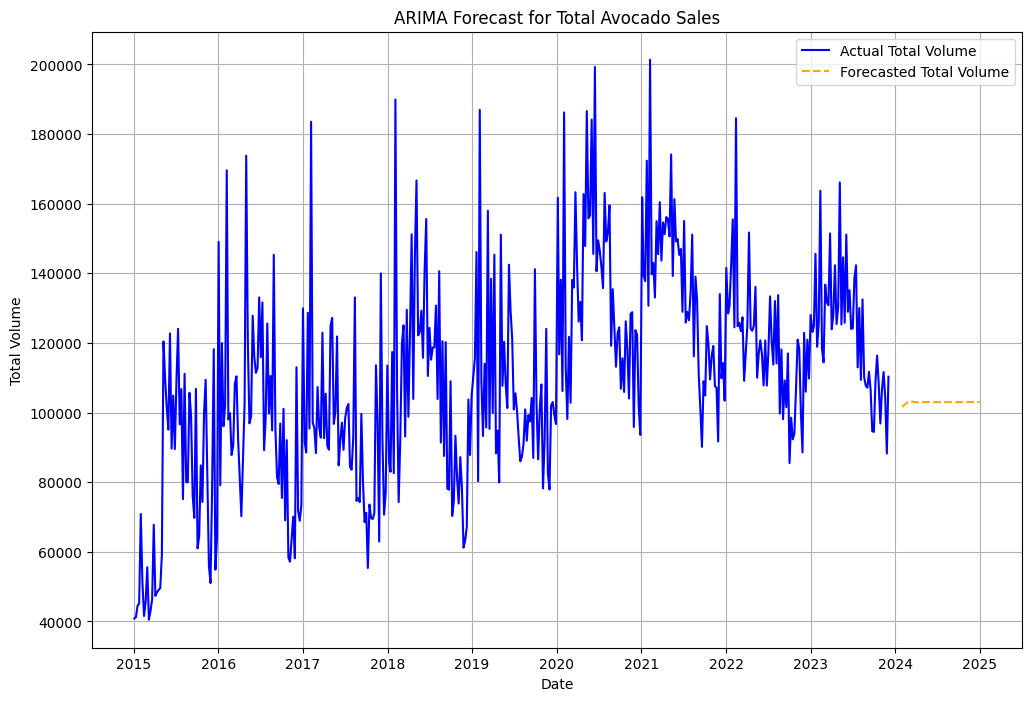

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the dataset
data = df_clean.copy()

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing dates
data.dropna(subset=['Date'], inplace=True)

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Ensure data is sorted by date
data.sort_index(inplace=True)

# Check for duplicates in the index
if data.index.duplicated().any():
    print("Duplicates found in the Date index. Removing duplicates.")
    data = data[~data.index.duplicated(keep='first')]

# Perform Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(data['TotalVolume'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Check if the series is stationary
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

# Fit the ARIMA model (adjust the (p, d, q) parameters as needed)
model = ARIMA(data['TotalVolume'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

# Make forecasts for the next 12 months
forecast = model_fit.get_forecast(steps=12)
forecast_values = forecast.predicted_mean

# Generate future dates for forecasted values
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Get the actual last 12 months data to compare with forecast
actual_values = data['TotalVolume'].iloc[-12:].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values[:len(actual_values)]))
print(f'RMSE: {rmse}')

# Plot the original and forecasted data
plt.figure(figsize=(12, 8))
plt.plot(data['TotalVolume'], label='Actual Total Volume', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Total Volume', color='orange', linestyle='--')
plt.title('ARIMA Forecast for Total Avocado Sales')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.grid()
plt.show()

The graph shows an ARIMA forecast model comparing actual avocado sales volumes to forecasted values. In the line graph, the x-axis represents time (years from 2015 to 2025), while the y-axis shows total volume, ranging from 0 to 200,000. The actual total volume line displays significant fluctuations over time, with noticeable peaks and troughs, while the forecasted total volume line appears as a flat line starting just before 2021, indicating a static prediction with no fluctuations.

The Root Mean Squared Error (RMSE) for the model is approximately 8,207.46, which measures the average deviation of the forecasted values from the actual values. This relatively low RMSE suggests that the ARIMA model provides accurate predictions; however, the flat forecast line indicates potential issues with capturing the variability in the data.

Additionally, the Augmented Dickey-Fuller (ADF) statistic is approximately -3.84, with a p-value of 0.0025, confirming that the time series is stationary. However, warnings indicate that the date index lacks frequency information, which may impact forecasting accuracy. The model's parameters show an autoregressive coefficient (ar.L1) of -0.1845 and a moving average coefficient (ma.L1) of -0.6468, both statistically significant.


The next step is tuning the forecasting models to improve their performance and accuracy. This process will involve adjusting the hyperparameters of each model to find the best settings for predicting total avocado sales.